In [2]:
import pandas as pd

In [4]:
df1=pd.read_csv(r"C:\Users\vijit\Downloads\movie_data\movies.csv")
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [29]:
df2=pd.read_csv(r"C:\Users\vijit\Downloads\movie_data\ratings.csv")
df2

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
df3=pd.read_csv(r"C:\Users\vijit\Downloads\movie_data\links.csv")
df3

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [10]:
df4=pd.read_csv(r"C:\Users\vijit\Downloads\movie_data\tags.csv")
df4

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## Shape of "movies.csv"

In [35]:
df1.shape

(9742, 3)

## Shape of "ratings.csv"

In [36]:
df2.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?
 

In [40]:
df2['userId'].nunique()

610

## Which movie has recieved maximum number of user ratings?


In [14]:
movie_rating_counts = df2.groupby('movieId').size()


max_rated_movie_id = movie_rating_counts.idxmax()


max_rated_movie_title = df1[df1['movieId'] == max_rated_movie_id]['title'].iloc[0]

print("Movie with the maximum number of ratings:", max_rated_movie_title)
print("Movie ID with the maximum number of ratings:", max_rated_movie_id)

Movie with the maximum number of ratings: Forrest Gump (1994)
Movie ID with the maximum number of ratings: 356


## identifying the tags of Matrix, The (1999)" movie

In [43]:

mtrx_movie = df1[df1['title'] == 'Matrix, The (1999)']
mtrx_movie_id = mtrx_movie['movieId'].values[0]

mtrx_tags = df4[df4['movieId'] == matrix_movie_id]

rare_tags = mtrx_tags['tag'].unique()
print("Tags of 'Matrix, The (1999)':")
print(rare_tags)

Tags of 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [22]:
terminator_movie = df1[df1['title'] == 'Terminator 2: Judgment Day (1991)']

if not terminator_movie.empty:
    terminator_movie_id = terminator_movie.iloc[0]['movieId']
    average_rating = df2[df2['movieId'] == terminator_movie_id]['rating'].mean()
    
    print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")
else:
    print("Movie not found")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

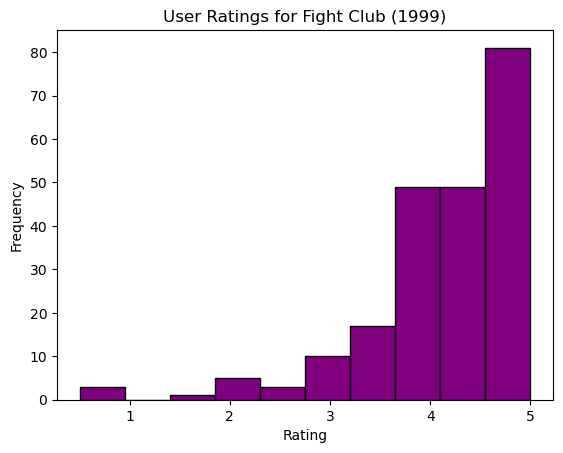

In [61]:
fight_club = df1[df1['title'] == 'Fight Club (1999)']

if not fight_club.empty:
    fight_club_movie_id = fight_club_movie.iloc[0]['movieId']

    fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]['rating']

    
    plt.hist(fight_club_ratings, bins=10, edgecolor='black',color='purple')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('User Ratings for Fight Club (1999)')
    plt.show()
else:
    print("Movie not found")

C:\Users\vijit\AppData\Local\Temp\ipykernel_2352\1001723590.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fight_club_ratings, shade=True, color='blue')
C:\Users\vijit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

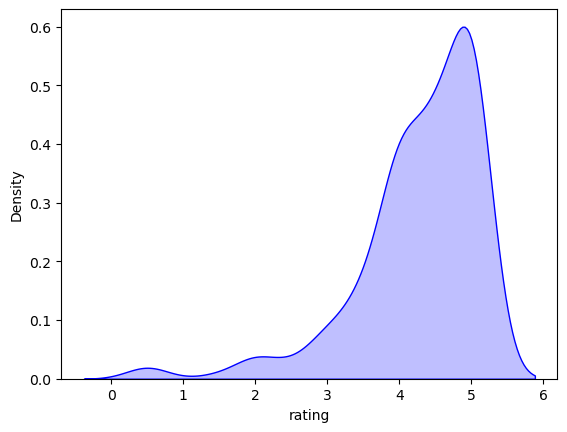

In [89]:
sns.kdeplot(fight_club_ratings, shade=True, color='blue')

***The above distribution exhibits "left-skewness". A left-skewed distribution means that most of the data points are on the right side, and the tail extends towards the left***

## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

## Which movie is the most popular based on  average user ratings?


In [68]:
grouped_ratings = df2.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

merge_data = pd.merge(df1, grouped_ratings, on='movieId', how='inner')

filter_data = merge_data[merge_data['rating_count'] > 50]

filter_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [71]:
sort_data = filtered_data.sort_values(by='rating_mean', ascending=False)
popular_movie = sort_data.iloc[0]
print("Most popular movie based on average user ratings is:")
print("The Title is:", popular_movie['title'])
print("Average User Rating :", popular_movie['rating_mean'])

Most popular movie based on average user ratings is:
The Title is: Shawshank Redemption, The (1994)
Average User Rating : 4.429022082018927


## Identifying which comes under top 5 popular movies based on number of user ratings

In [74]:
ratings_count = filtered_data.sort_values(by='rating_count', ascending=False)

Top_5_popular_movies = ratings_count.head(5)

print("Top 5 popular movies based on number of user ratings:")
print(Top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [83]:
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

sci_fi_ratings = sci_fi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular = sci_fi_ratings.iloc[2] 

print("Third most popular Sci-Fi movie based on number of user ratings:")
print("Movie Title is:", third_most_popular['title'])
print("Number of User Ratings:", third_most_popular['rating_count'])

Third most popular Sci-Fi movie based on number of user ratings:
Movie Title is: Jurassic Park (1993)
Number of User Ratings: 238


## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

## Mention the movieId of the movie which has the highest IMDB rating

## Webscrapping 

In [90]:
import requests
import numpy as np
from bs4 import BeautifulSoup  
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)  
    soup = BeautifulSoup(response.text, 'html.parser')  
    imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})  
    return imdb_rating.text if imdb_rating else np.nan

In [91]:
df3=pd.read_csv(r"C:\Users\vijit\Downloads\movie_data\links.csv")
df3

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [94]:
merged_linked_data = pd.merge(merged_data, df3, on='movieId', how='inner')
merged_linked_data

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429,113041,11862.0
...,...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000,5476944,432131.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000,5914996,445030.0
9721,193585,Flint (2017),Drama,1,3.500000,6397426,479308.0
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000,8391976,483455.0


In [95]:
df2

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [102]:
merged_linked_data_ratings = pd.merge(merged_links_data_df, df2, on='movieId', how='inner')
merged_linked_data_ratings 

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.00000,5476944,432131.0,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.50000,5914996,445030.0,184,3.5,1537109545
100833,193585,Flint (2017),Drama,1,3.50000,6397426,479308.0,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.50000,8391976,483455.0,184,3.5,1537110021


In [104]:
average_rat = merged_linked_data_ratings.groupby('movieId')['rating'].mean().reset_index()
average_rat

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [105]:
highest_imdb_rating = average_rat.loc[avg_rat['rating'].idxmax()]
highest_imdb_rating 

movieId    53.0
rating      5.0
Name: 48, dtype: float64

## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [111]:
sci_fi = merged_linked_data_ratings[merged_linked_data_ratings['genres'].str.contains('Sci-Fi')]
sci_fi

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,userId,rating,timestamp
1286,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,6,4.0,845554397
1287,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,32,3.0,856737205
1288,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,71,2.0,864740028
1289,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,111,2.5,1518640854
1290,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,181,3.0,845470571
...,...,...,...,...,...,...,...,...,...,...
100806,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,3,3.666667,5095030,363088.0,596,4.0,1535709468
100816,189547,Iron Soldier (2010),Action|Sci-Fi,1,1.000000,1665744,111196.0,210,1.0,1528486011
100818,190183,The Darkest Minds (2018),Sci-Fi|Thriller,1,3.500000,4073790,445651.0,50,3.5,1533302021
100825,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,1,4.500000,5805470,432985.0,184,4.5,1537109489


In [114]:
highly_rated_scifi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
highly_rated_scifi_movie

movieId                    24
title           Powder (1995)
genres           Drama|Sci-Fi
rating_count               28
rating_mean             3.125
imdbId                 114168
tmdbId                12665.0
userId                    234
rating                    5.0
timestamp          1004407893
Name: 1293, dtype: object

In [117]:
print("The Sci-Fi movie which has the highest IMDB rating", high_rated_sci_fi_movie['movieId'])


The Sci-Fi movie which has the highest IMDB rating 24
